In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geoplot as gplt
import geopandas as gpd

In [6]:
# Create path

path = r'/Users/laceymarchment/Desktop/A6'

In [7]:
# Import map

nyc = gpd.read_file(os.path.join(path, 'NTA.zip'))

In [8]:
# Import dataset

df = pd.read_csv(os.path.join(path,'df_clean.csv'))

In [9]:
df.shape

(48858, 15)

### 5. Wrangle your project data to meet the needs of your analysis.

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
# Create smaller dataframe 

df = df[['neighbourhood', 'price', 'latitude', 'longitude']]

In [11]:
df.head(5)

,neighbourhood,price,latitude,longitude
0,Kensington,149,40.64749,-73.97237
1,Midtown,225,40.75362,-73.98377
2,Harlem,150,40.80902,-73.94190
3,Clinton Hill,89,40.68514,-73.95976
4,East Harlem,80,40.79851,-73.94399


In [12]:
# Create new dataframe with mean price for each neighbourhood

df_mean = df.groupby('neighbourhood')['price'].mean()

df_mean.reset_index()

,neighbourhood,price
0,Allerton,87.595238
1,Arden Heights,67.250000
2,Arrochar,115.000000
3,Arverne,171.779221
4,Astoria,117.187778
...,...,...
216,Windsor Terrace,138.993631
217,Woodhaven,67.170455
218,Woodlawn,60.090909
219,Woodrow,700.000000


In [13]:
nyc.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227807,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904842,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711907,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
3,3.0,Brooklyn,047,BK25,Homecrest,2.999197e+07,27514.022550,"POLYGON ((-73.95859 40.61040, -73.95828 40.608..."
4,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."


In [14]:
# Rename column to merge with df_mean 

nyc = nyc.rename(columns={'ntaname': 'neighbourhood'})

In [15]:
nyc.head()

,boro_code,boro_name,county_fip,ntacode,neighbourhood,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227807,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904842,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711907,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
3,3.0,Brooklyn,047,BK25,Homecrest,2.999197e+07,27514.022550,"POLYGON ((-73.95859 40.61040, -73.95828 40.608..."
4,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."


In [16]:
nyc.isnull().sum()

boro_code        0
boro_name        0
county_fip       0
ntacode          0
neighbourhood    0
shape_area       0
shape_leng       0
geometry         0
dtype: int64

### 6. Merge the two data files into a single GeoDataFrame.

In [17]:
# Merge both dataframes on the "neighbourhood" column

df_geo = nyc.merge(df_mean, on = 'neighbourhood', how = 'outer', indicator = True)

In [18]:
df_geo.head()

,boro_code,boro_name,county_fip,ntacode,neighbourhood,shape_area,shape_leng,geometry,price,_merge
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227807,"POLYGON ((-73.97605 40.63128, -73.97717 40.630...",63.066176,both
1,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904842,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",220.958763,both
2,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711907,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",81.183784,both
3,3.0,Brooklyn,047,BK25,Homecrest,2.999197e+07,27514.022550,"POLYGON ((-73.95859 40.61040, -73.95828 40.608...",NaN,left_only
4,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",NaN,left_only


### 7. Clean your merged GeoDataFrame.

In [19]:
# Check for missing values

df_geo.isnull().sum()

boro_code        152
boro_name        152
county_fip       152
ntacode          152
neighbourhood      0
shape_area       152
shape_leng       152
geometry         152
price            126
_merge             0
dtype: int64

In [20]:
# Impute missing price values with the median

df_geo['price'].fillna(df_geo['price'].median(), inplace=True)

In [21]:
df_geo.isnull().sum()

boro_code        152
boro_name        152
county_fip       152
ntacode          152
neighbourhood      0
shape_area       152
shape_leng       152
geometry         152
price              0
_merge             0
dtype: int64

In [22]:
df_geo = df_geo.dropna()

In [23]:
# Check shape

df_geo.shape

(195, 10)

In [48]:
# Drop duplicates if any

df_geo = df_geo.drop_duplicates()

In [ ]:
# Check for extreme values 

df_geo.describe() 

In [69]:
# Export df_geo

df_geo.to_csv(os.path.join(path,'df_geo.csv'))

### 8. Create a choropleth map using a variable of your choice.

Text(0.5, 1.0, 'Price Across Neighbourhoods')

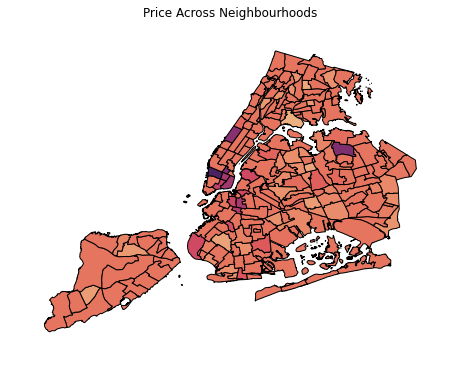

In [29]:
# Create geoplot

gp = gplt.choropleth(df_geo, hue = df_geo['price'], scheme = None, cmap='flare', figsize=(8, 8))
plt.title('Price Across Neighbourhoods')

In [45]:
#

def plot_coloropeth_borough(borough, ax, legend_pos):
    
    if borough == "all":
        ax = df_geo.plot(ax=ax, 
                                     figsize=(15,15), 
                                     column='price', 
                                     cmap='flare', 
                                     scheme='quantiles',
                                     edgecolor='orange', 
                                     legend=True, 
                                     legend_kwds = legend_pos
                                    )
    else:
        ax = df_geo[df_geo.neighbourhood \
                                == borough].plot(ax=ax, 
                                                      figsize=(10,10), 
                                                      column='price', 
                                                      cmap='flare', 
                                                      scheme='quantiles',
                                                      edgecolor='orange', 
                                                      legend=True, 
                                                      legend_kwds = legend_pos
                                                     )

    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    return ax

In [46]:
#

legend_pos = {
    "all": {'loc':'upper left'},
    "Manhattan": {'loc':'upper left'},
    "Brooklyn": {'loc':'lower right'},
    "Bronx": {'loc':'upper right'},
    "Queens": {'loc':'lower left'},
    "Staten Island": {'loc':'lower right'}
}

/Users/laceymarchment/miniconda3/envs/env/lib/python3.9/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/laceymarchment/miniconda3/envs/env/lib/python3.9/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/Users/laceymarchment/miniconda3/envs/env/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


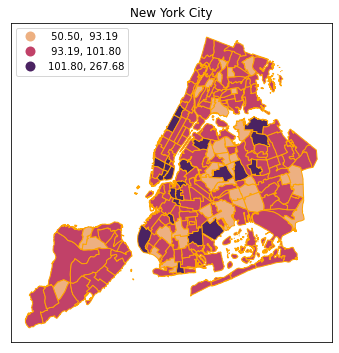

In [47]:
#

fig, axes = plt.subplots(3, 2)
fig.set_size_inches(16, 20)
axes[0,0] = plot_coloropeth_borough("all", axes[0,0], legend_pos["all"])
axes[0,0].set_title("New York City")
axes[0,1] = plot_coloropeth_borough("Manhattan", axes[0,1], legend_pos["Manhattan"])
axes[0,1].set_title("Manhattan")
axes[1,0] = plot_coloropeth_borough("Brooklyn", axes[1,0], legend_pos["Brooklyn"])
axes[1,0].set_title("Brookyln")
axes[1,1] = plot_coloropeth_borough("Bronx", axes[1,1], legend_pos["Bronx"])
axes[1,1].set_title("Bronx")
axes[2,0] = plot_coloropeth_borough("Queens", axes[2,0], legend_pos["Queens"])
axes[2,0].set_title("Queens")
axes[2,1] = plot_coloropeth_borough("Staten Island", axes[2,1], legend_pos["Staten Island"])
axes[2,1].set_title("Staten Island")

plt.show()

### 9. Discuss the results and what they mean in a markdown section.
#### Does the analysis answer any of your existing research questions?

#### Price and among different boroughs? - Manhattan has more expensive regions.

#### Does the analysis lead you to any new research questions?

#### I would like to futher research if price affects bookings.

In [4]:
# Drop the listings that the price is higher than $400

df_400 = df[df['price']<400]

Text(0, 0.5, 'Frequency')

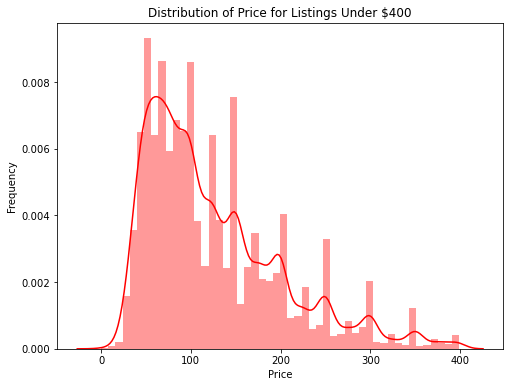

In [16]:
# Distribution of price for the listings that the price is less than $400

plt.figure(figsize=(8,6))
sns.distplot(df_400['price'], color = 'red')
plt.title('Distribution of Price for Listings Under $400')
plt.xlabel('Price')
plt.ylabel('Frequency')